<a href="https://colab.research.google.com/github/Mazzarolo/Weather-Image-Classifier/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Verificar hardware
!nvidia-smi

Fri Jul 28 16:37:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Variavel para verificar o path
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
#Instalar o yolo
!pip install ultralytics

from IPython import display
display.clear_output()

!yolo checks

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow

YOUR_API_KEY = ""

rf = Roboflow(api_key=YOUR_API_KEY)
project = rf.workspace("testing-uutoy").project("weather-classification-fa0p4")
dataset = project.version(1).download("folder")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Weather-Classification-1 in folder:: 100%|██████████| 1116/1116 [00:00<00:00, 1429.13it/s]


In [6]:
# Treinar o dataset
%cd {HOME}

print(dataset.location)

!yolo task=classify mode=train data={dataset.location} model=yolov8s-cls.pt epochs=10 imgsz=64

/content
/content/Weather-Classification-1
100% 12.2M/12.2M [00:00<00:00, 235MB/s]
Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/Weather-Classification-1, epochs=10, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

/content


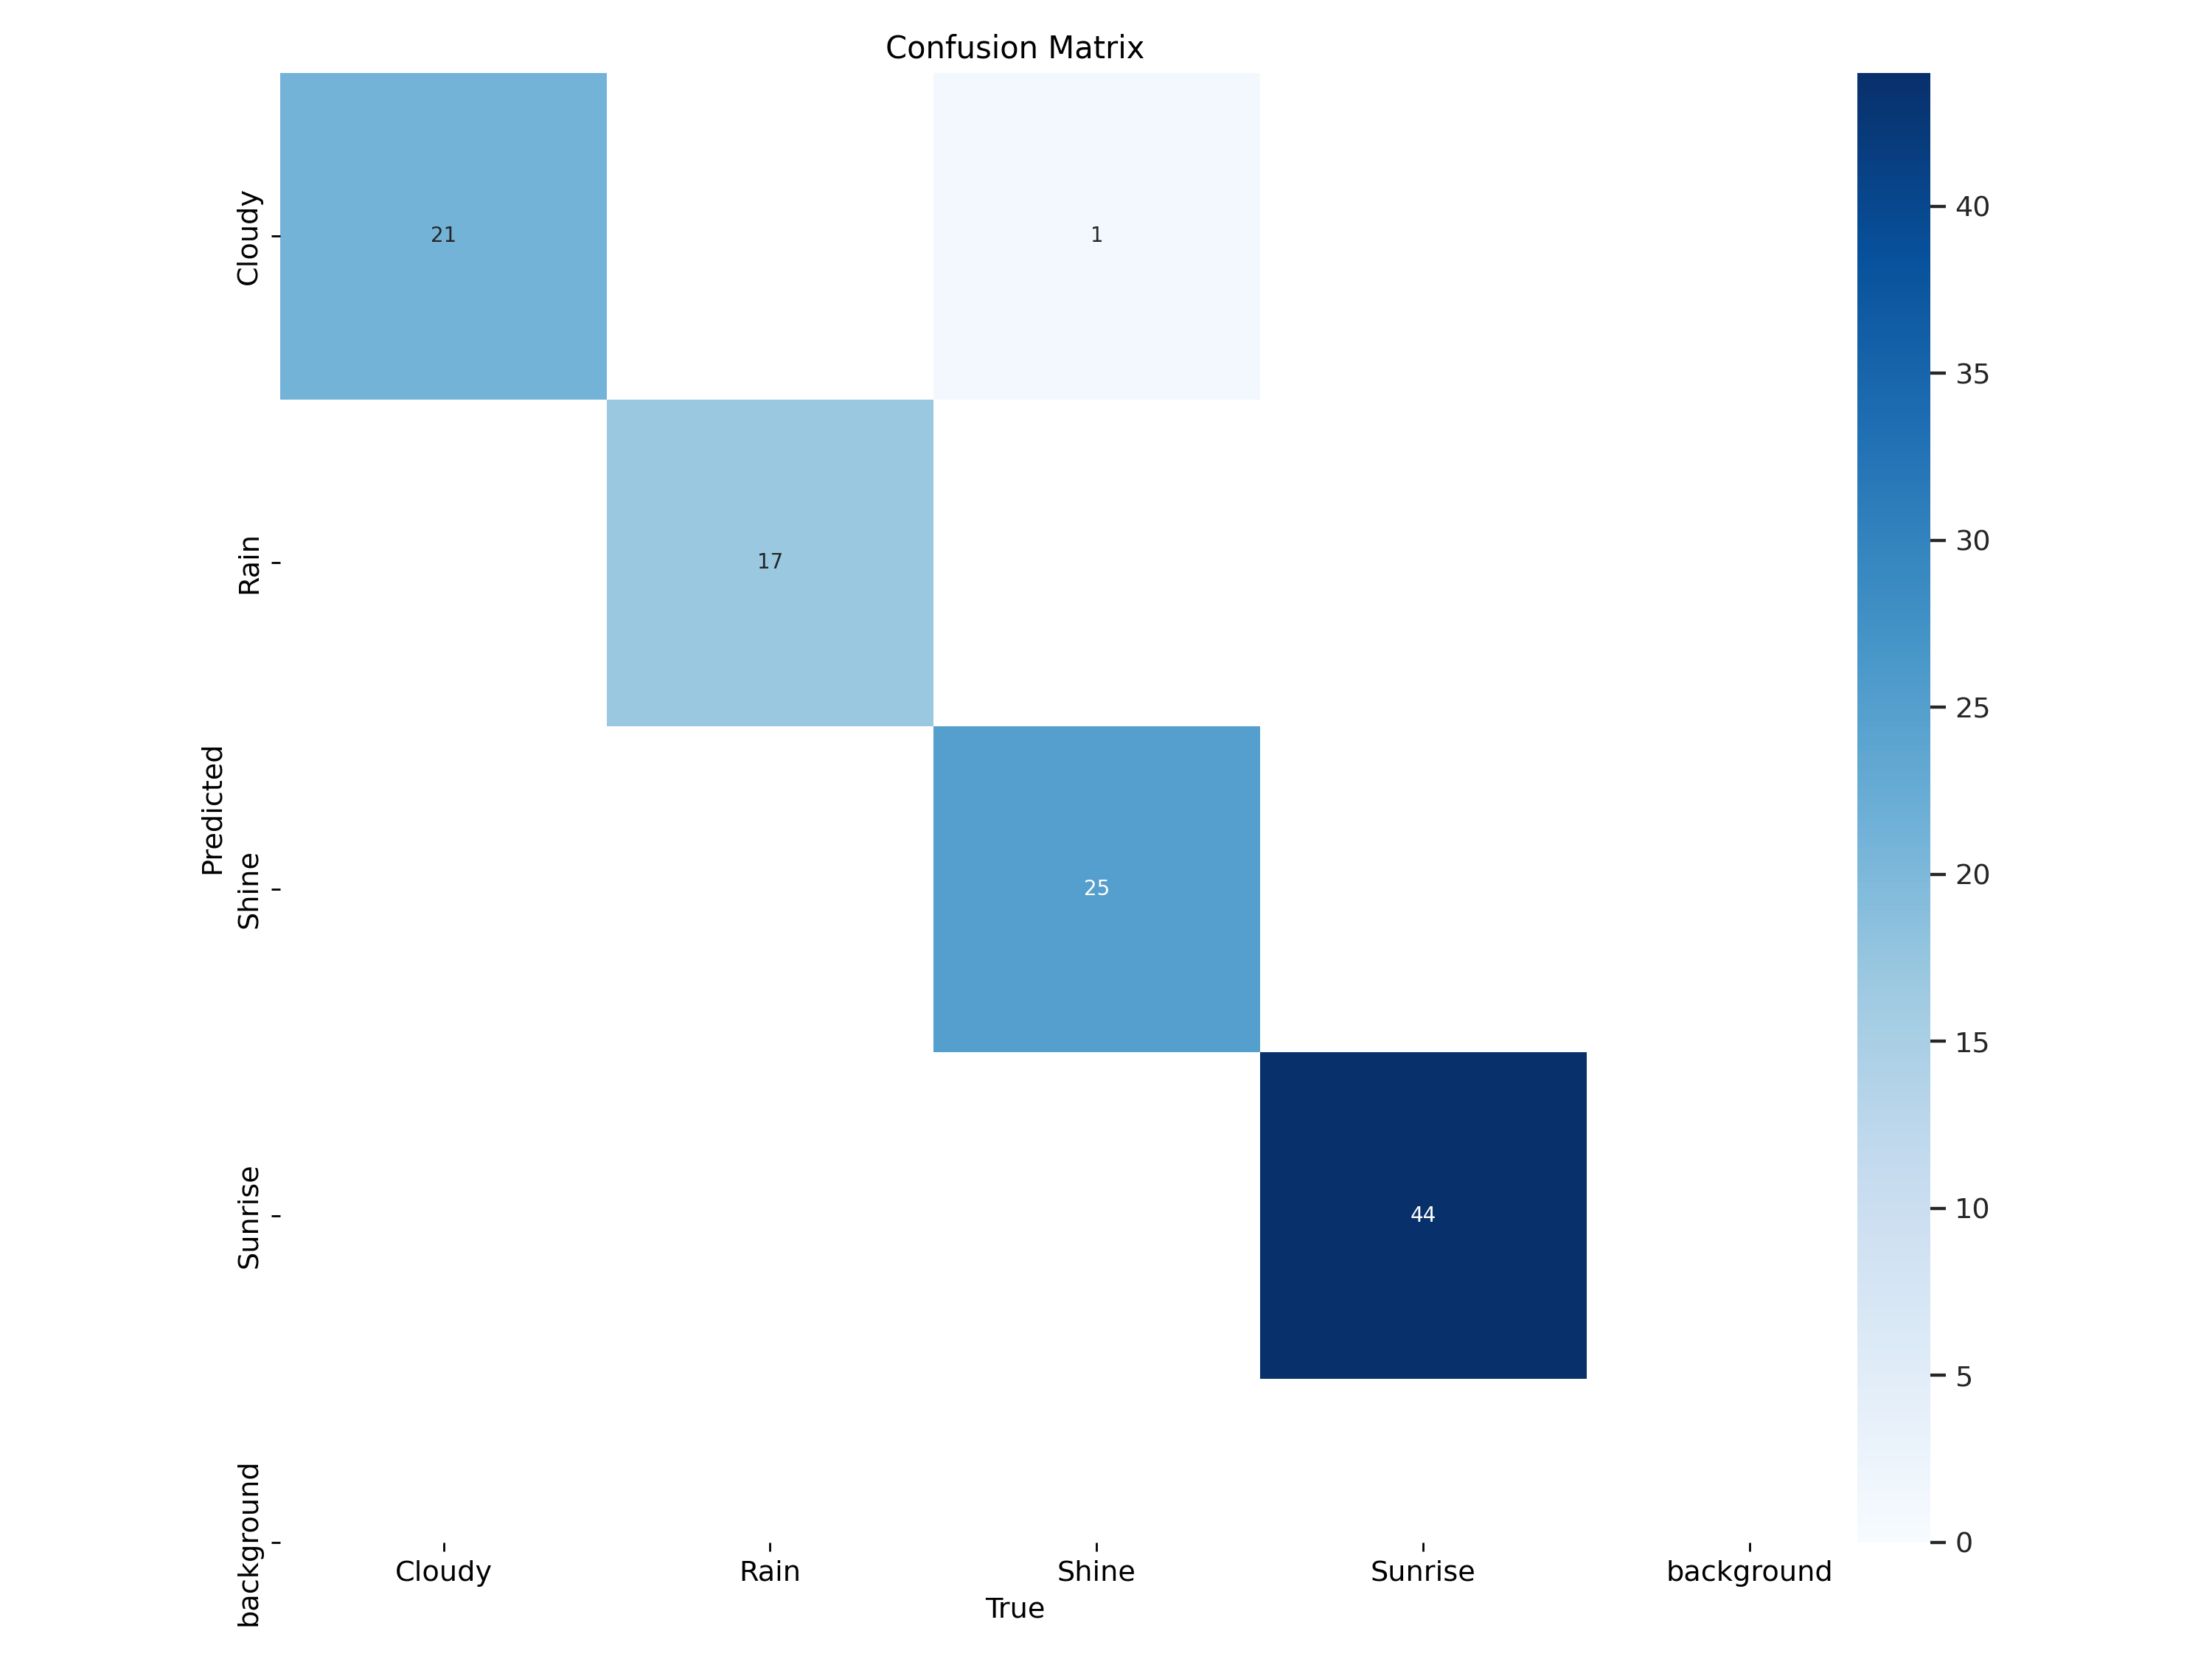

In [16]:
from PIL import Image

%cd {HOME}

img = Image.open(f'{HOME}/runs/classify/train/confusion_matrix.png')
img.show()

/content


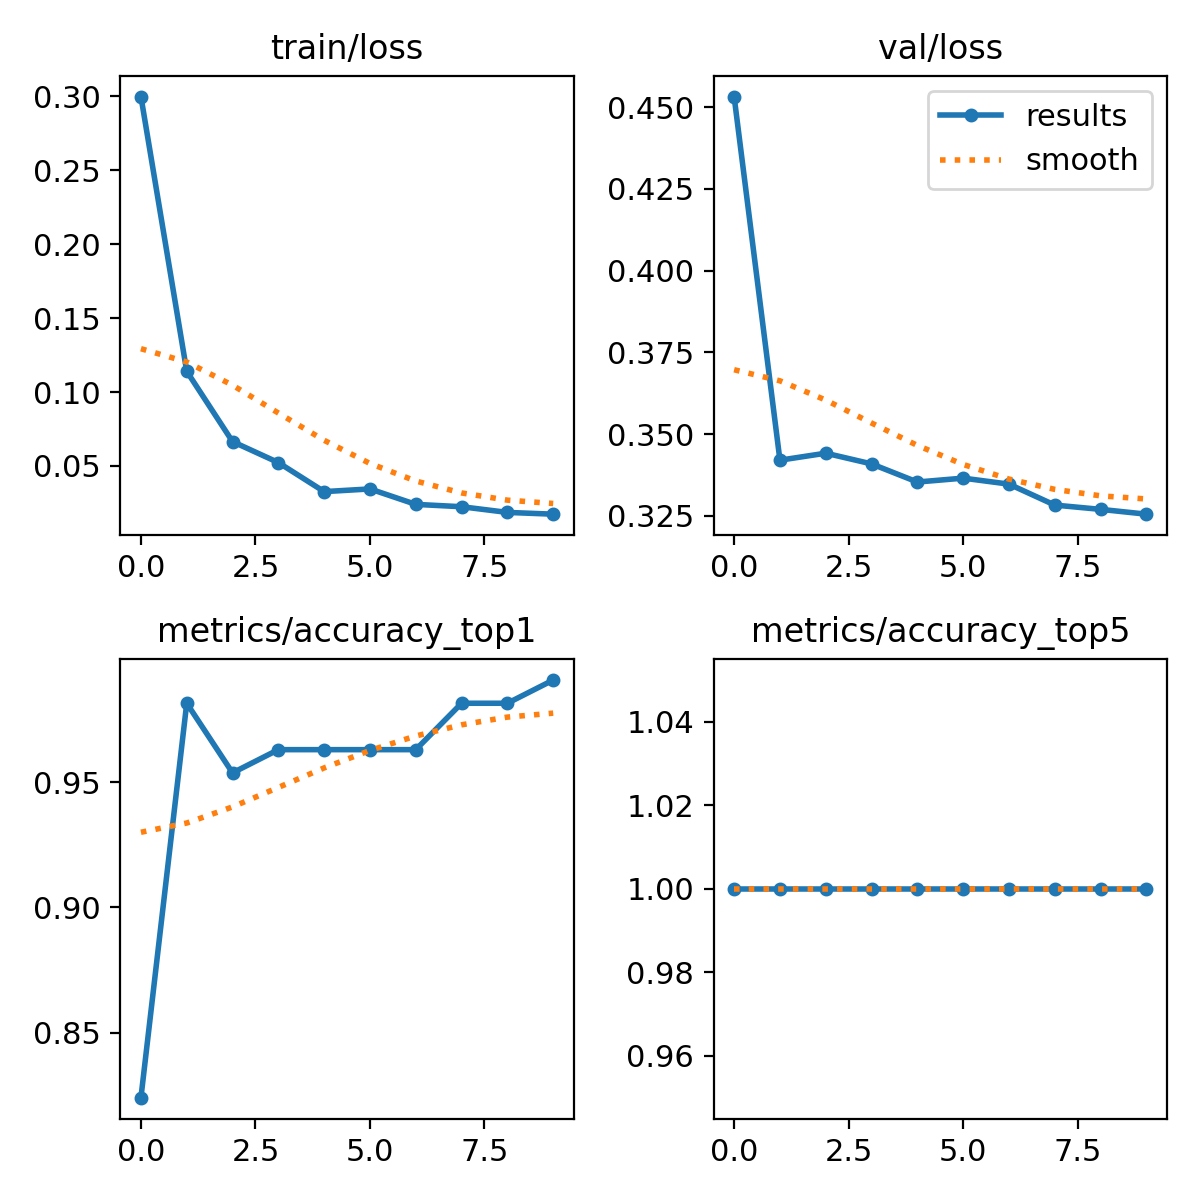

In [23]:
from PIL import Image

%cd {HOME}

img = Image.open(f'{HOME}/runs/classify/train/results.png')
img.show()

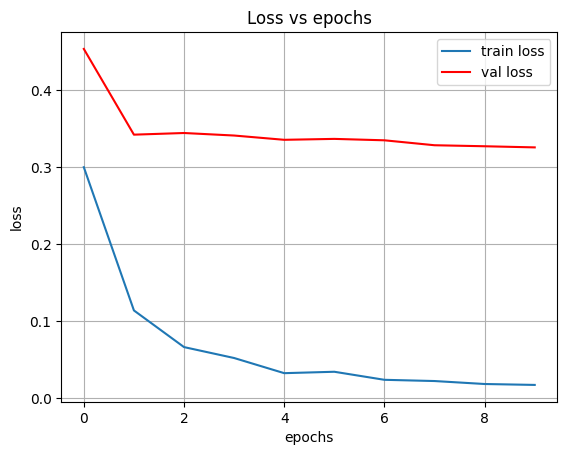

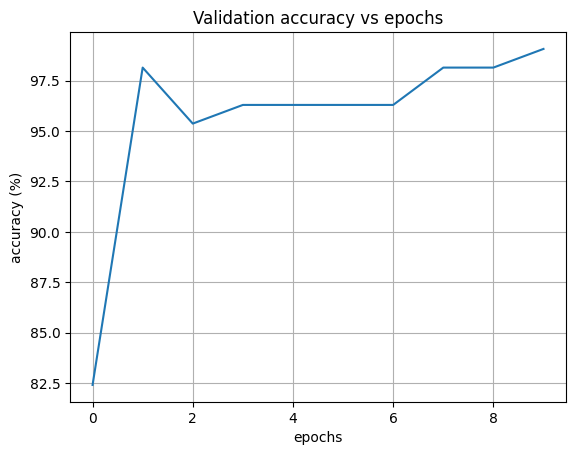

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = HOME + '/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()

In [18]:
# Validar o dataset
%cd {HOME}

print(dataset.location)

!yolo task=classify mode=val data={dataset.location} model={HOME}/runs/classify/train/weights/best.pt

/content
/content/Weather-Classification-1
Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5080324 parameters, 0 gradients
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
               classes   top1_acc   top5_acc: 100% 7/7 [00:00<00:00,  8.19it/s]
                   all      0.991          1
Speed: 0.6ms preprocess, 5.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [22]:
# Validar o dataset
%cd {HOME}

print(dataset.location)

!yolo task=classify mode=predict source={dataset.location}/test/Sunrise model={HOME}/runs/classify/train/weights/best.pt

/content
/content/Weather-Classification-1
Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5080324 parameters, 0 gradients

image 1/44 /content/Weather-Classification-1/test/Sunrise/sunrise102_jpg.rf.9f19f419277a70cd1bfe5e3f1adaebef.jpg: 64x64 Sunrise 1.00, Shine 0.00, Rain 0.00, Cloudy 0.00, 4.0ms
image 2/44 /content/Weather-Classification-1/test/Sunrise/sunrise107_jpg.rf.95aac0dd8301afe02296c9df7d6f1c69.jpg: 64x64 Sunrise 1.00, Cloudy 0.00, Shine 0.00, Rain 0.00, 4.0ms
image 3/44 /content/Weather-Classification-1/test/Sunrise/sunrise112_jpg.rf.fdf13d66638f57de6bbff8cea1687186.jpg: 64x64 Sunrise 1.00, Cloudy 0.00, Shine 0.00, Rain 0.00, 3.9ms
image 4/44 /content/Weather-Classification-1/test/Sunrise/sunrise114_jpg.rf.dd937eb07b1e425d7776a973808fd38d.jpg: 64x64 Sunrise 0.99, Shine 0.01, Rain 0.00, Cloudy 0.00, 3.0ms
image 5/44 /content/Weather-Classification-1/test/Sunrise/sunrise126_jpg.rf.15bb83e72d4b8985c

/content


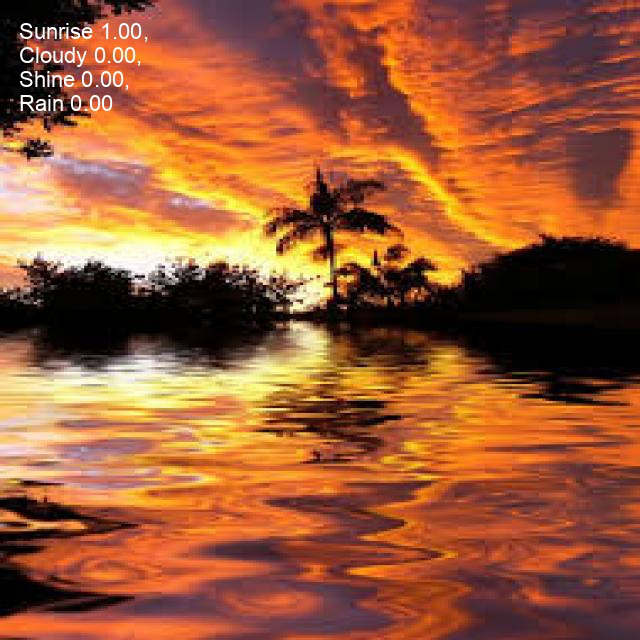

In [25]:
from PIL import Image

%cd {HOME}

img = Image.open(f'{HOME}/runs/classify/predict2/sunrise126_jpg.rf.15bb83e72d4b8985c9146ce59818346e.jpg')
img.show()